# Importation des libraries

In [ ]:
%load_ext rpy2.ipython

In [ ]:
# %%R
# install.packages("MASS")
# install.packages("randomForest")
# install.packages("VSURF")

# install.packages("FactoMineR")
# install.packages("factoextra")
# install.packages("corrplot")

# install.packages("olsrr")

In [ ]:
%%R
library("MASS")
library("randomForest")
library("VSURF")

library("FactoMineR")
library("factoextra")
library("corrplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
%%R
data = read.csv("/content/drive/MyDrive/197 variétés de niébé.csv")

In [53]:
%%R
head(data)

  Pedigree    DS50F     DS1G     B3PLT    DS95M  DS1ereF    DSFFG      DSL
1        4 52.66667 50.00000 0.4650000 48.00000 47.33333 75.66667 5.333333
2        5 47.00000 44.66667 0.1166667 42.66667 42.33333 61.00000 6.000000
3        6 53.00000 49.00000 0.2533333 47.00000 47.66667 71.00000 6.000000
4        9 54.00000 50.33333 0.1100000 48.33333 47.66667 72.33333 4.666667
5       10 53.00000 49.00000 0.2033333 47.00000 47.00000 69.33333 5.000000
6       14 53.00000 49.33333 0.6400000 47.33333 47.33333 66.33333 5.000000
     ML15G    MNL15G Poids100g
1 16.27000 10.223333  19.13333
2 17.51000  9.533333  21.90000
3 17.37000 10.000000  27.53333
4 13.59000 10.443333  15.63333
5 15.90667 10.580000  20.93333
6 16.51000  9.663333  24.85000


In [54]:
%%R
summary(data)

    Pedigree         DS50F            DS1G           B3PLT       
 Min.   :  4.0   Min.   :36.33   Min.   :37.33   Min.   :0.0300  
 1st Qu.:171.2   1st Qu.:50.00   1st Qu.:46.00   1st Qu.:0.1100  
 Median :420.5   Median :52.67   Median :49.17   Median :0.1450  
 Mean   :381.0   Mean   :51.50   Mean   :48.64   Mean   :0.1839  
 3rd Qu.:556.5   3rd Qu.:54.00   3rd Qu.:51.67   3rd Qu.:0.2133  
 Max.   :725.0   Max.   :60.00   Max.   :57.00   Max.   :1.4600  
                                                 NA's   :1       
     DS95M          DS1ereF          DSFFG            DSL       
 Min.   :35.33   Min.   :33.00   Min.   :53.50   Min.   :4.000  
 1st Qu.:44.00   1st Qu.:42.67   1st Qu.:65.25   1st Qu.:5.000  
 Median :47.17   Median :46.67   Median :68.33   Median :5.000  
 Mean   :46.64   Mean   :45.87   Mean   :67.69   Mean   :5.144  
 3rd Qu.:49.67   3rd Qu.:49.33   3rd Qu.:71.00   3rd Qu.:5.333  
 Max.   :55.00   Max.   :55.00   Max.   :79.50   Max.   :7.000  
                 

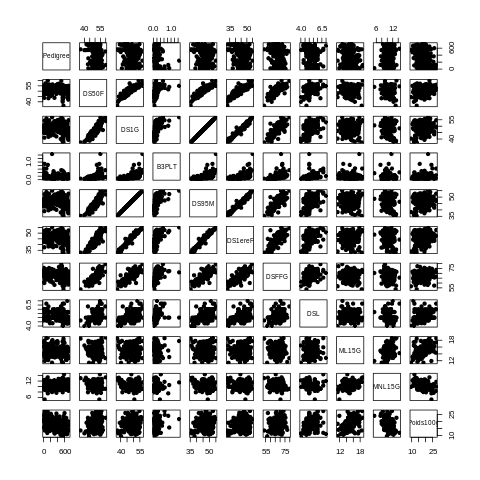

In [55]:
%%R
pairs(data, pch = 19)

In [56]:
%%R
index_val_manq = which(is.na(data),arr.ind=TRUE)[,1] # recuperer les indexes des valeus manquantes
index_val_manq

[1] 153 122


In [57]:
%%R
data <- data[-index_val_manq,] # supressions des valeus manquantes
head(data)

  Pedigree    DS50F     DS1G     B3PLT    DS95M  DS1ereF    DSFFG      DSL
1        4 52.66667 50.00000 0.4650000 48.00000 47.33333 75.66667 5.333333
2        5 47.00000 44.66667 0.1166667 42.66667 42.33333 61.00000 6.000000
3        6 53.00000 49.00000 0.2533333 47.00000 47.66667 71.00000 6.000000
4        9 54.00000 50.33333 0.1100000 48.33333 47.66667 72.33333 4.666667
5       10 53.00000 49.00000 0.2033333 47.00000 47.00000 69.33333 5.000000
6       14 53.00000 49.33333 0.6400000 47.33333 47.33333 66.33333 5.000000
     ML15G    MNL15G Poids100g
1 16.27000 10.223333  19.13333
2 17.51000  9.533333  21.90000
3 17.37000 10.000000  27.53333
4 13.59000 10.443333  15.63333
5 15.90667 10.580000  20.93333
6 16.51000  9.663333  24.85000


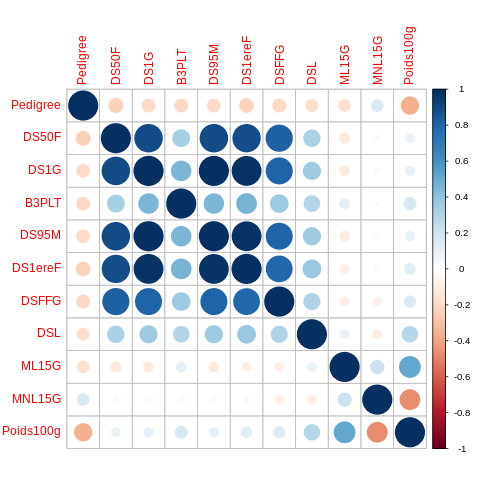

In [58]:
%%R
library("corrplot")
cor_mat = cor(data)
corrplot(cor_mat, is.corr=TRUE)

# ACP


In [59]:
%%R
data_scale = as.data.frame(scale(data)) # dataset normalisé
res.pca <- PCA(data_scale, graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 194 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

In [60]:
%%R
round(mean(data_scale$DS50F)) # moyenne centrée

[1] 0


In [61]:
%%R
sd(data_scale$DS50F) # ecart type reduit

[1] 1


In [62]:
%%R
eig.val <- get_eigenvalue(res.pca)
round(eig.val, 2)

       eigenvalue variance.percent cumulative.variance.percent
Dim.1        5.06            46.02                       46.02
Dim.2        1.87            17.00                       63.01
Dim.3        1.22            11.10                       74.11
Dim.4        0.82             7.42                       81.53
Dim.5        0.73             6.68                       88.21
Dim.6        0.68             6.22                       94.43
Dim.7        0.28             2.58                       97.01
Dim.8        0.18             1.59                       98.61
Dim.9        0.13             1.17                       99.78
Dim.10       0.02             0.22                      100.00
Dim.11       0.00             0.00                      100.00


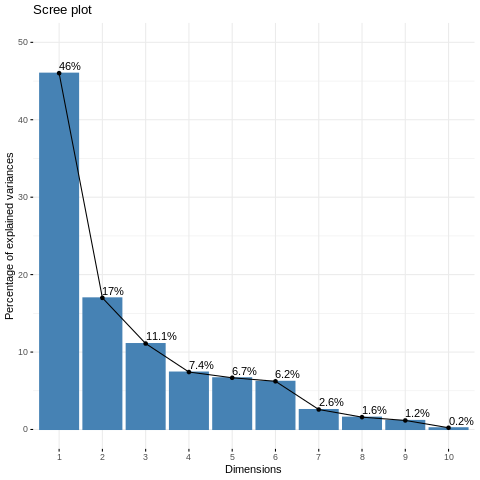

In [63]:
%%R
fviz_eig(res.pca, addlabels = TRUE, ylim=c(0, 50))

In [64]:
%%R
var = get_pca_var(res.pca)# Extraction des résultats pour les variables.
ind = get_pca_ind(res.pca)# Extraction des résultats pour les individus.

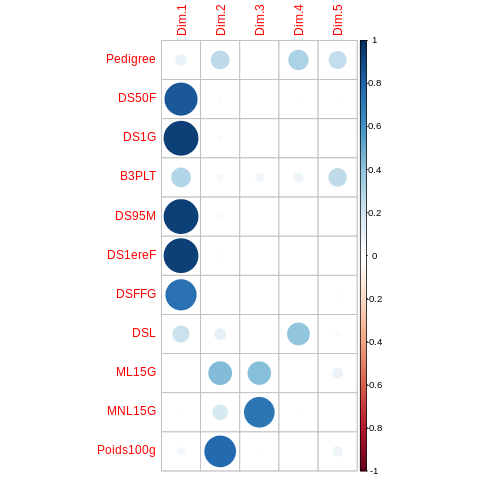

In [65]:
%%R
corrplot(var$cos2, is.corr=TRUE)

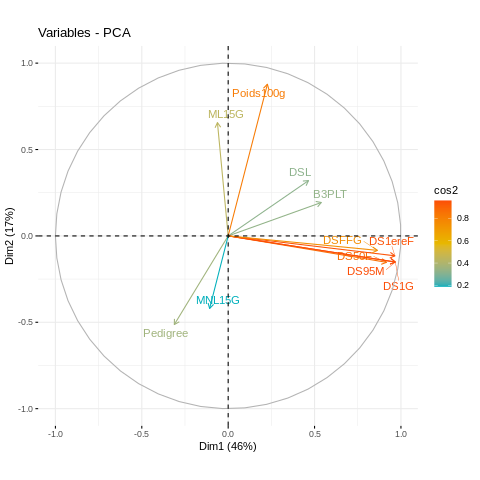

In [66]:
%%R
fviz_pca_var(res.pca, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

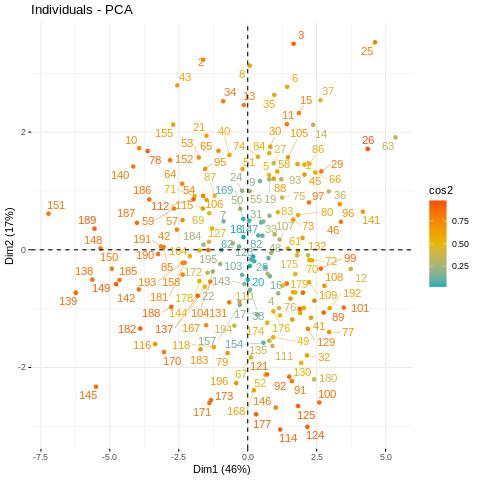

In [67]:
%%R
fviz_pca_ind(res.pca, col.ind = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

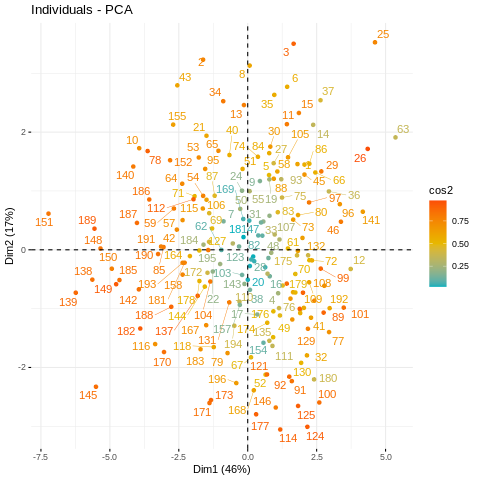

In [68]:
%%R
fviz_pca_ind(res.pca, col.ind = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

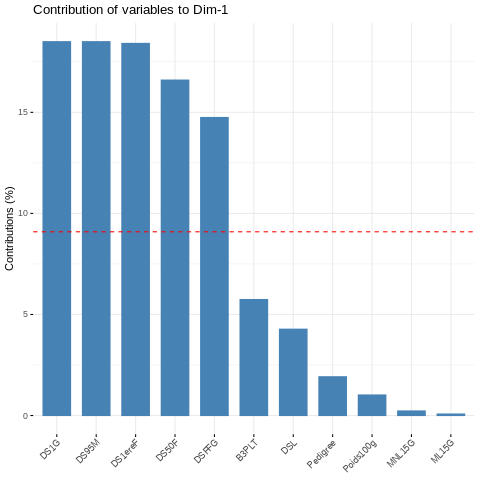

In [69]:
%%R
fviz_contrib(res.pca, choice = "var", axes = 1) # variables dimension 1

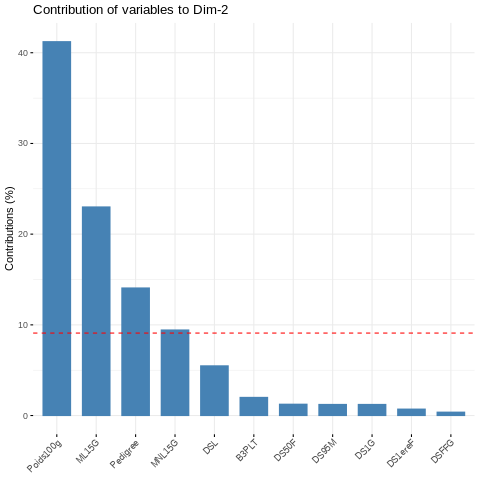

In [70]:
%%R
fviz_contrib(res.pca, choice = "var", axes = 2) # variables dimension 2

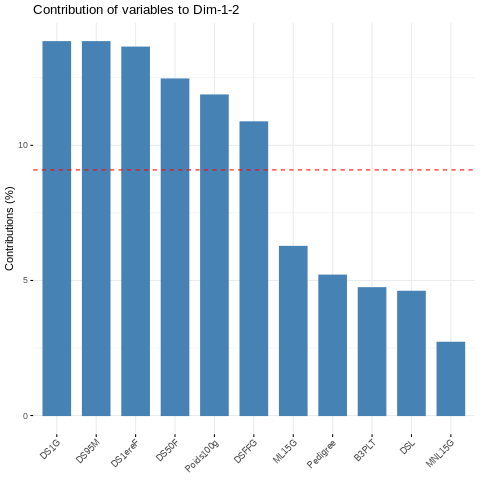

In [71]:
%%R
fviz_contrib(res.pca, choice = "var", axes = c(1, 2)) # variables dimensions 1 et 2

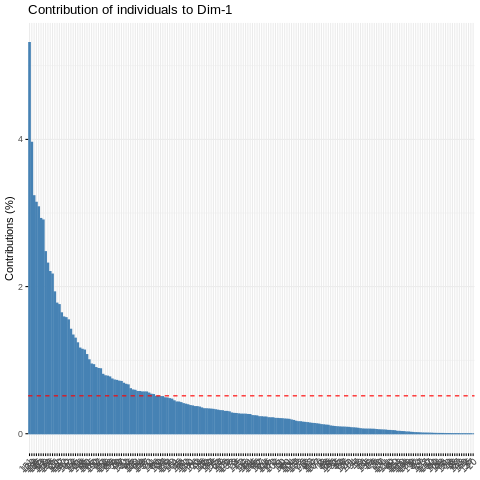

In [72]:
%%R
fviz_contrib(res.pca, col.ind = "cos2", choice = "ind", axes = 1) # induvidus dimension 1

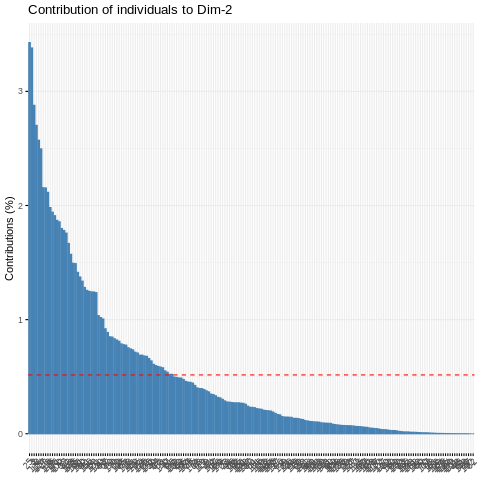

In [73]:
%%R
fviz_contrib(res.pca, col.ind = "cos2", choice = "ind", axes = 2) # induvidus dimension 2

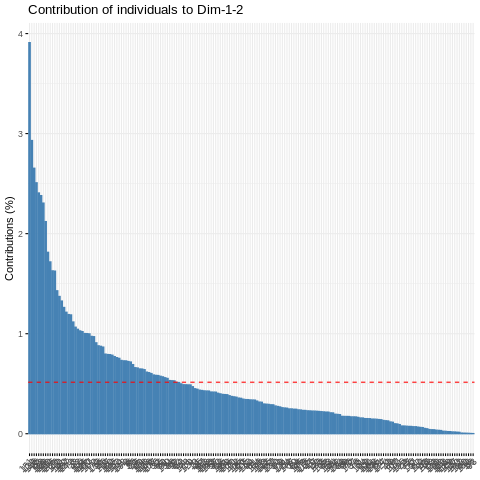

In [74]:
%%R
fviz_contrib(res.pca, col.ind = "cos2", choice = "ind", axes = c(1, 2)) # induvidusdimensions 1 et 2

# Selection de variables

## Blabla

In [48]:
%%R
LRT_dev = function(mod1, mod2){
  1 - pchisq(deviance(mod1) - deviance(mod2), df.residual(mod1) - df.residual(mod2))
}

In [49]:
%%R
# ------------------------DIRECTION ASCENDANTE------------------------------------
model0 = lm(Pedigree ~ 1 , data = data)
model1 = lm(Pedigree ~ DS50F, data = data)
LRT_dev(model0, model1)

model2 = lm(Pedigree ~ DS50F + DS1G, data = data)
LRT_dev(model1, model2)


model3 = lm(Pedigree ~ DS50F + DS1G + B3PLT, data = data)
LRT_dev(model2, model3)

model4 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M, data = data)
LRT_dev(model3, model4)

model5 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF, data = data)
LRT_dev(model4, model5)

model6 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG, data = data)
LRT_dev(model5, model6)

model7 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL, data = data)
LRT_dev(model6, model7)

model8 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G, data = data)
LRT_dev(model7, model8)

model9 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G + MNL15G, data = data)
LRT_dev(model8, model9)

model10 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G + MNL15G + Poids100g, data = data)
LRT_dev(model9, model10)

[1] 0


In [50]:
%%R
# ------------------------DIRECTION DESCENDANTE------------------------------------

model0 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G + MNL15G + Poids100g, data = data)
model1 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G + MNL15G, data = data)
LRT_dev(model1, model0)

model2 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + ML15G, data = data)
LRT_dev(model2, model1)

model3 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL, data = data)
LRT_dev(model3, model2)

model4 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG, data = data)
LRT_dev(model4, model3)

model5 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF, data = data)
LRT_dev(model5, model4)

model6 = lm(Pedigree ~ DS50F + DS1G + B3PLT + DS95M, data = data)
LRT_dev(model6, model5)

model7 = lm(Pedigree ~ DS50F + DS1G + B3PLT, data = data)
LRT_dev(model7, model6)

model8 = lm(Pedigree ~ DS50F + DS1G, data = data)
LRT_dev(model8, model7)

model9 = lm(Pedigree ~ DS50F, data = data)
LRT_dev(model9, model8)

model10 = lm(Pedigree ~ 1, data = data)
LRT_dev(model10, model9)

[1] 0


## Step Wise

In [75]:
%%R
model <- lm(Pedigree ~., data = data) 
step.model <- stepAIC(model, direction = "both")

Start:  AIC=2078.49
Pedigree ~ DS50F + DS1G + B3PLT + DS95M + DS1ereF + DSFFG + DSL + 
    ML15G + MNL15G + Poids100g


Step:  AIC=2078.49
Pedigree ~ DS50F + DS1G + B3PLT + DS1ereF + DSFFG + DSL + ML15G + 
    MNL15G + Poids100g

            Df Sum of Sq     RSS    AIC
- DSL        1        20 7870549 2076.5
- DSFFG      1      2452 7872981 2076.6
- ML15G      1      5918 7876446 2076.6
- MNL15G     1      8030 7878559 2076.7
- DS1ereF    1     73944 7944473 2078.3
- B3PLT      1     79485 7950014 2078.4
<none>                   7870529 2078.5
- DS1G       1    118593 7989122 2079.4
- DS50F      1    184032 8054561 2081.0
- Poids100g  1    243481 8114010 2082.4

Step:  AIC=2076.49
Pedigree ~ DS50F + DS1G + B3PLT + DS1ereF + DSFFG + ML15G + MNL15G + 
    Poids100g

            Df Sum of Sq     RSS    AIC
- DSFFG      1      2458 7873007 2074.6
- ML15G      1      5945 7876494 2074.6
- MNL15G     1      8076 7878625 2074.7
- DS1ereF    1     74584 7945133 2076.3
- B3PLT      1     80425 

In [76]:
%%R
summary(model)


Call:
lm(formula = Pedigree ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-456.86 -163.44   12.73  164.76  417.34 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 1027.4168   379.7709   2.705  0.00746 **
DS50F        -20.1519     9.7155  -2.074  0.03945 * 
DS1G          32.9213    19.7715   1.665  0.09760 . 
B3PLT       -158.3906   116.1928  -1.363  0.17449   
DS95M              NA         NA      NA       NA   
DS1ereF      -21.6276    16.4494  -1.315  0.19022   
DSFFG          1.4739     6.1556   0.239  0.81103   
DSL            0.7592    34.9534   0.022  0.98269   
ML15G         -5.5880    15.0237  -0.372  0.71036   
MNL15G         7.3211    16.8968   0.433  0.66532   
Poids100g    -16.0128     6.7116  -2.386  0.01806 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 184 degrees of freedom
Multiple R-squared:  0.1885,	Adjusted R-sq

In [77]:
%%R
library(olsrr)

ols_step_forward_p(model, penter=0.05)

R[write to console]: 
Attaching package: ‘olsrr’


R[write to console]: The following object is masked from ‘package:MASS’:

    cement


R[write to console]: The following object is masked from ‘package:datasets’:

    rivers





                             Selection Summary                               
----------------------------------------------------------------------------
        Variable                   Adj.                                         
Step     Entered     R-Square    R-Square     C(p)        AIC         RMSE      
----------------------------------------------------------------------------
   1    Poids100g      0.1263      0.1217    8.1150    2629.3779    210.0879    
   2    DS50F          0.1674      0.1587    0.7771    2622.0115    205.6132    
----------------------------------------------------------------------------


In [78]:
%%R
ols_step_backward_p(model, prem = 0.05)

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison

R[write to console]: Note: model has aliased coefficients
      sums of squares computed by model comparison





                            Elimination Summary                             
---------------------------------------------------------------------------
        Variable                  Adj.                                         
Step    Removed     R-Square    R-Square     C(p)        AIC         RMSE      
---------------------------------------------------------------------------
   1    DSL           0.1885      0.1534    8.0005    2631.0395    206.2608    
   2    DSFFG         0.1883      0.1577    6.0579    2629.1001    205.7377    
   3    ML15G         0.1876      0.1615    4.2065    2627.2566    205.2696    
   4    MNL15G        0.1873      0.1657    2.2674    2625.3208    204.7568    
   5    DS1ereF       0.1801      0.1627    1.9174    2625.0501    205.1267    
   6    B3PLT         0.1697      0.1566    2.2544    2625.4736    205.8680    
---------------------------------------------------------------------------


In [79]:
%%R
ols_step_both_p(model, penter=0.05)


                               Stepwise Selection Summary                                
----------------------------------------------------------------------------------------
                      Added/                   Adj.                                         
Step    Variable     Removed     R-Square    R-Square     C(p)        AIC         RMSE      
----------------------------------------------------------------------------------------
   1    Poids100g    addition       0.126       0.122    8.1150    2629.3779    210.0879    
   2      DS50F      addition       0.167       0.159    0.7770    2622.0115    205.6132    
----------------------------------------------------------------------------------------


In [ ]:
%%R
#summary(step.model)

## Random Forest

In [80]:
%%R
data.rf <- randomForest(Pedigree ~ ., data=data, importance=TRUE, proximity=TRUE)
data.rf


Call:
 randomForest(formula = Pedigree ~ ., data = data, importance = TRUE,      proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 45504.34
                    % Var explained: 8.98


In [83]:
# %%R
# round(importance(data.rf), 2)

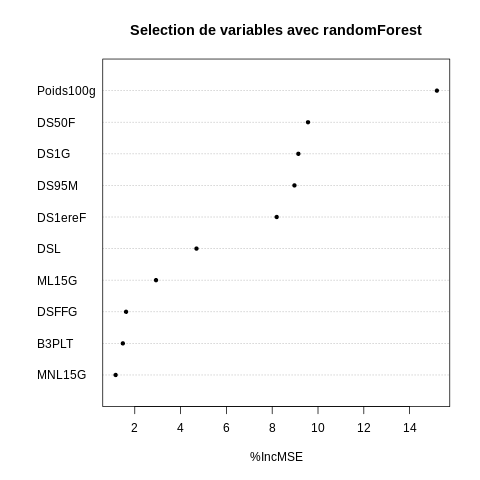

In [84]:
%%R
library(VSURF)
rf_vs = randomForest(Pedigree ~ .,data=data,mtry=2,ntree=500,importance=TRUE)
varImpPlot(rf_vs,type=1,pch=20, col=1, cex=1,main="Selection de variables avec randomForest")

In [85]:
%%R
X = data[,-1]
y = data$Pedigree

th_1 = VSURF_thres(X, y, ntree=500)

Thresholding step
Estimated computational time (on one core): 12 sec.
  |======================================================================| 100%

In [86]:
%%R
vs_1 = VSURF_interp(X, y,vars=th_1$varselect.thres)


Interpretation step (on 8 variables)
Estimated computational time (on one core): between 16.8 sec. and  26.4 sec.
  |======================================================================| 100%

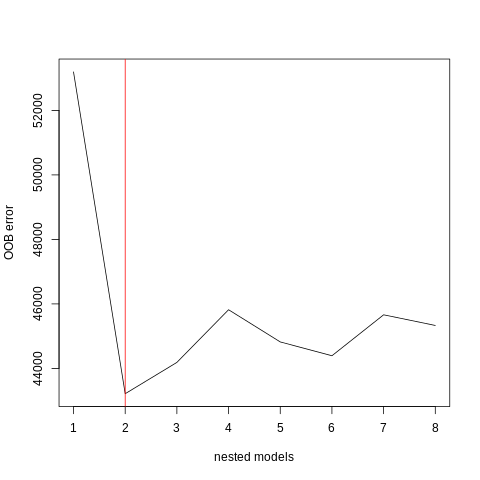

In [87]:
%%R
plot(vs_1)

In [88]:
%%R
vs_1$varselect.interp

[1] 10  1


In [89]:
%%R
names(X)[vs_1$varselect.interp]

[1] "Poids100g" "DS50F"    


In [ ]:
%%R

## Prediction

In [ ]:
%%R
set.seed(1)
train_size = 0.8
train.index = sample.int(length(data$Pedigree), round(length(data$Pedigree)) * train_size)

train = data[train.index,]
test = data[-train.index,]

dim(test)

[1] 39 11


In [ ]:
%%R
model = lm(Pedigree ~., data = train)
summary(model)


Call:
lm(formula = Pedigree ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.15 -161.75   11.76  167.93  397.16 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  687.223    417.131   1.647   0.1016  
DS50F        -12.698     10.506  -1.209   0.2288  
DS1G          49.192     23.069   2.132   0.0347 *
B3PLT         73.614    201.532   0.365   0.7154  
DS95M             NA         NA      NA       NA  
DS1ereF      -47.189     19.081  -2.473   0.0145 *
DSFFG          5.644      7.104   0.794   0.4283  
DSL            1.534     40.250   0.038   0.9696  
ML15G         -8.480     15.968  -0.531   0.5962  
MNL15G        13.437     18.056   0.744   0.4580  
Poids100g    -16.281      7.184  -2.266   0.0249 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 202 on 145 degrees of freedom
Multiple R-squared:  0.2072,	Adjusted R-squared:  0.1579 
F-statist

In [ ]:
%%R
model = lm(Pedigree ~ - DS50F, data = train)
summary(model)


Call:
lm(formula = Pedigree ~ -DS50F, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.59 -213.59   34.41  169.91  334.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   390.59      17.68    22.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 220.1 on 154 degrees of freedom

